<div>
    <h1><center>CS105 Mini-Project</center></h1>
    <h2><center>Does who a student is living with effect if and how they work jobs?</center></h2>
    <p>By: <b>NAMES HERE</b></p>
</div>

# Data Loading & Preprocessing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Load dataframe from data.csv
df = pd.read_csv("data.csv")

# Select relevant columns
df = df.iloc[:, [0, 2, 7, 8, 9, 58, 59, 60, 61, 26]]
df

,Timestamp,What is your current class standing?,Who do you live with?,"Do you currently live in a house, apartnment, or dorm?",How many people live in your household?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have roommates that are part of your major?
0,2/9/2024 20:12:14,Senior,Neither,House,6,Yes,5 - 10,Off-campus,No,No
1,2/9/2024 20:16:34,Junior,Both,Apartment,4,No,NaN,NaN,NaN,Yes
2,2/9/2024 20:18:55,Junior,Friends,House,4,No,NaN,NaN,NaN,No
3,2/9/2024 20:24:00,Senior,Neither,Apartment,1,No,NaN,NaN,No,No
4,2/9/2024 20:26:16,Graduate,Neither,Apartment,1,Yes,10 - 20,Off-campus,Yes,No
...,...,...,...,...,...,...,...,...,...,...
255,2/14/2024 19:46:28,Junior,Friends,House,5,Yes,10 - 20,On-campus,No,No
256,2/15/2024 0:28:38,NaN,Family,Apartment,North District 4 bed 2 bath,No,NaN,NaN,NaN,No
257,2/15/2024 8:33:45,Senior,Family,House,9,No,1 - 5,Off-campus,No,No
258,2/15/2024 16:10:40,Sophomore,Family,Apartment,4,Yes,5 - 10,On-campus,No,No


## Preprocessing

In [2]:
# Fixes empty values
df['Do you currently work?'] = df['Do you currently work?'].fillna('No')

# Replaces custom text answers with appropriate values
df['How many people live in your household?'] = (df['How many people live in your household?']
                                                 .fillna(0)
                                                 .replace('4 in total', '4')
                                                 .replace('4 (Including me)', '4')
                                                 .replace('at school 4 including me ', '4')
                                                 .replace('3 excluding me', '4')
                                                 .replace('5 including me', '5')
                                                 .replace('North District 4 bed 2 bath', '4')
                                                 .replace('3 (room), 8 (hall), ~70 (building)', '3')
                                                 .astype(int))
df['Who do you live with? '] = df['Who do you live with? '].replace('Family, Friends', 'Both').replace('Family, Friends, Both', 'Both')
# Normalizes non-applicable answers
df.loc[df['Do you currently work?'] == 'No', 'How many hours do you work per week on average?'] = 0
df.loc[df['Do you currently work?'] == 'No', 'Do you work in a department related to your major?'] = np.nan

df

,Timestamp,What is your current class standing?,Who do you live with?,"Do you currently live in a house, apartnment, or dorm?",How many people live in your household?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have roommates that are part of your major?
0,2/9/2024 20:12:14,Senior,Neither,House,6,Yes,5 - 10,Off-campus,No,No
1,2/9/2024 20:16:34,Junior,Both,Apartment,4,No,0,NaN,NaN,Yes
2,2/9/2024 20:18:55,Junior,Friends,House,4,No,0,NaN,NaN,No
3,2/9/2024 20:24:00,Senior,Neither,Apartment,1,No,0,NaN,NaN,No
4,2/9/2024 20:26:16,Graduate,Neither,Apartment,1,Yes,10 - 20,Off-campus,Yes,No
...,...,...,...,...,...,...,...,...,...,...
255,2/14/2024 19:46:28,Junior,Friends,House,5,Yes,10 - 20,On-campus,No,No
256,2/15/2024 0:28:38,NaN,Family,Apartment,4,No,0,NaN,NaN,No
257,2/15/2024 8:33:45,Senior,Family,House,9,No,0,Off-campus,NaN,No
258,2/15/2024 16:10:40,Sophomore,Family,Apartment,4,Yes,5 - 10,On-campus,No,No


In [3]:
# Working DataFrame
w_df = df[df['Do you currently work?'] == 'Yes']
# Not working DataFrame
nw_df = df[df['Do you currently work?'] == 'No']
#w_df

In [4]:
nw_df

,Timestamp,What is your current class standing?,Who do you live with?,"Do you currently live in a house, apartnment, or dorm?",How many people live in your household?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have roommates that are part of your major?
1,2/9/2024 20:16:34,Junior,Both,Apartment,4,No,0,NaN,NaN,Yes
2,2/9/2024 20:18:55,Junior,Friends,House,4,No,0,NaN,NaN,No
3,2/9/2024 20:24:00,Senior,Neither,Apartment,1,No,0,NaN,NaN,No
5,2/9/2024 20:45:09,Junior,Both,Apartment,4,No,0,NaN,NaN,No
6,2/9/2024 21:55:59,Sophomore,Friends,Apartment,4,No,0,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...
253,2/14/2024 13:45:45,Senior,Family,House,6,No,0,NaN,NaN,No
254,2/14/2024 16:26:06,Junior,Family,House,5,No,0,NaN,NaN,Yes
256,2/15/2024 0:28:38,NaN,Family,Apartment,4,No,0,NaN,NaN,No
257,2/15/2024 8:33:45,Senior,Family,House,9,No,0,Off-campus,NaN,No


# Analysis

In [5]:
import matplotlib.pyplot as plt

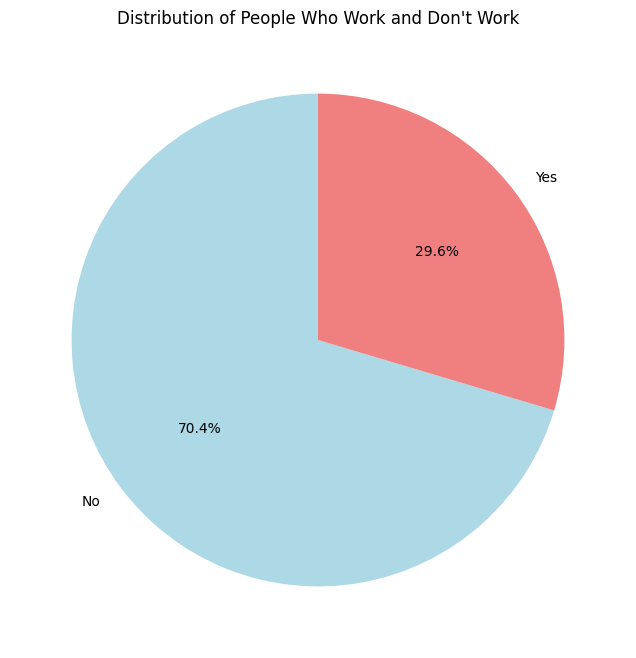

In [6]:
# Count the number of people who work and don't work
work_counts = df['Do you currently work?'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of People Who Work and Don\'t Work')
plt.show()